# Lab 4 - Integration Exercises 

### Grading: 
We will be doing the cyclic grading cycle for this assignment.  See the complete syllabus - posted on Moodle - some detailed notes on grading and correcting your work.

Do your work in this file, so it is easy for me to find/grade.  However, there are good reasons to use multiple files in traditional coding projects, so if you have a good reason to want to make a new file, please talk to me about how to make that work.

#### Version-0: 
Switch back to the Version-0 branch in labs to do this work.  Before you leave lab today, commit your changes to GitHub, and open a pull request, comparing your forked Version-0 branch back to my original repository.  That's all.

#### Version-1: 
By Monday 5:00pm, clean up any unfinished details.  
   * Every code should be well documented with comments.
   * __Every function should have a docstring.__
   * Every graph should be well labeled.  If there is more than one data set or curve, add a legend.
   * Describe each graph with a short paragraph.  What is data plotted, why is it interesting, what model fits that data, is this the model you expect?  Give a written scientific description in complete sentences.  Feel free to modify these prompts to suit the particular graph.
   * Open a pull request on GitHub comparing your forked Version-1 branch back to my original repository.

#### Version-2*: 
After class on Monday, I will post my solution.  
   * Compare our solutions, and look for places you could improve your work 
     * Are your calculations correct?
     * Did you understand (and describe) the physics correctly? 
     * Did you forget anything?
   * Make improvements and comments about your changes.  

\*I called this the Final Version in the syllabus. 

-----------------------------------------------------------------------------------------------
## from Newman w/ modifications and additions
-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------
### Newman Exercise 5.1 - original problem.
-----------------------------------------------------------------------------------------------
In the on-line resources you will find a file called
```velocities.txt```, which contains two columns of numbers, the first
representing time~$t$ in seconds and the second the $x$-velocity in
 meters per second of a particle, measured once every second from time
$t=0$ to $t=100$.  The first few lines look like this:
```python
0	0
1	0.069478
2	0.137694
3	0.204332
4	0.269083
5	0.331656
```
Write a program to do the following:
* Read in the data and, using the trapezoidal rule, calculate from them
  the approximate distance traveled by the particle in the $x$ direction as
  a function of time.  See Section 2.4.3 on page 57 if you want a reminder
  of how to read data from a file.
* Extend your program to make a graph that shows, on the same plot,
  both the original velocity curve and the distance traveled as a function
  of time.
  
-----------------------------------------------------------------------------------------------
### Newman Exercise 5.1 - notes and modifications.
-----------------------------------------------------------------------------------------------
This problem is funny - you can't use your algorithm for calculating the trapezoid method for a function, you have to do something quite different here - calculate the area of each trapezoid given both its legs.  You also need to store each step in an array, so you can plot the displacement as a function of time.  

I recommend you grab a whiteboard and work this out ahead of coding it.

Be sure to:
1.  Make separate plots for $x$ vs. $t$ and the $v$ vs. $t$ so you can see the details on $v$.
2.  Add labels to your plots - as many as needed to clearly convey the physics.
3.  Describe your plots physically - be sure to explain the relationship between the $x$ vs. $t$ to the $v$ vs. $t$, so it is clear the numerical integration is a good model for the given velocity data.

The total displacement is:  1315.76098218


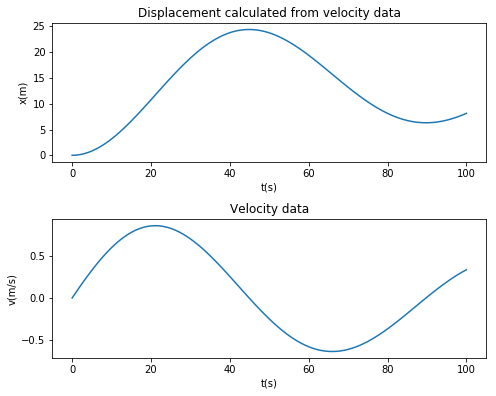

In [13]:
### Solutions Newman 5.1
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

#integrate an array of values (rather than a function)
def integrate_array(data_x,data_y):
    '''
    integrate data array using either the trapezoid method
    
    data_x = np.array() 1D of independent variable of function being int
    data_y = np.array() 1D of DEPENDENT variable of function being int
    '''
    
    a = data_x[0]   #start of the interval
    b = data_x[-1]  #end of the interval
    N = data_x.size #number of values in array
    h = (b-a)/N     #dt - the width of each step - note that times have to be equally spaced for this to work
    
    S = np.zeros(N) #the integral which we must plot
    S[0] = 0.0      #no displacement yet
    
    for i in range(1,N):
        #apply the trapezoid rule to each step, add it to the previous sum
        #\Delta x = x_0 + v_avg * dt 
        S[i] = S[i-1] + h*(data_y[i-1]+data_y[i])/2.0
        
    return S

#read the data
all_data = np.loadtxt("velocities.txt")
t = all_data[:,0]  #time
v = all_data[:,1]  #velocity

#calculate the displacement array
x = integrate_array(t,v)  

#calculate the total displacement
print("The total displacement is: ", x.sum())

#make the plot
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 5.6))

#plot displacement
ax1.plot(t,x)
ax1.set_ylabel("x(m)")
ax1.set_xlabel("t(s)")

#plot velocity
ax2.plot(t,v)
ax2.set_ylabel("v(m/s)")
ax2.set_xlabel("t(s)")

ax1.set_title("Displacement calculated from velocity data")
ax2.set_title("Velocity data")
plt.tight_layout()

### Analysis of 5.1 
In the plots above, we show displacement vs. time and velocity vs. time for an unknown object.  We are given the velocity data, which appears to be oscillating (however we have less than two periods of data if this is so).  We were directed to calculate the integral of the displacement and here I present my result.  In order to check that I performed the numerical integration correctly, here is my analysis of the physics:
* at t=0s the object has a zero velocity, and is slowly increasing.  Correspondingly,  x(t) is small, but slowly increasing in time.
* at t=20s the object has a maximum positive velocity, and the slope of x(t) is large and positive
* at t=40s the object has slowed down and reached v(t) = 0 m/s, thus the displacement is at a maximum positive value
* at t=65s the object has a large negative velocity and the displacement has a large negative slope
* at t=100s the object has a large positive velocity and the displacement is increasing.

Thus the consistent agreement between our numerical integral and $x=\int v dt$ suggests we have done our integration correctly.

-----------------------------------------------------------------------------------------------
### Newman Exercise 5.3 - original problem.
-----------------------------------------------------------------------------------------------
Consider the integral
$$
E(x) = \int_0^x e^{-t^2} dt.
$$
1. Write a program to calculate $E(x)$ for values of $x$ from 0 to 3 in
  steps of 0.1.  Choose for yourself what method you will use for
  performing the integral and a suitable number of slices.
  
2. When you are convinced your program is working, extend it further to
  make a graph of $E(x)$ as a function of $x$.  If you want to remind
  yourself of how to make a graph, you should consult Section 3.1, starting
  on page 88.

Note that there is no known way to perform this particular integral
analytically, so numerical approaches are the only way forward.

-----------------------------------------------------------------------------------------------
### Newman Exercise 5.3 - notes and modifications.
-----------------------------------------------------------------------------------------------

The Gaussian integral does have analytic solutions in the limit from $-\infty$ to $\infty$.
It is a very usefull and famous integrals, and there are many fun ways to work 
out useful solutions.  For instance: 
$$
\int_{-\infty}^{\infty} e^{-t^2} dt = \sqrt{\pi}
$$
ref: https://en.wikipedia.org/wiki/Gaussian_integral

Calculate the Gaussian interval over an even interval (for instance a=-1, b=1) and check that you get the expected result under reasonable numerical approximations.  Check this for several intervals.  Calculate the percent difference between your value and the expected as the interval grows larger.  At when does your integral agree with the exact result within rounding error?  Make a table summarizing your work, and plot of $b$ vs. $error$ to show this.

Make a plot of the function $E(x)$ vs. $x$ along with the integral both for Newman's example and the additional question.

In [2]:
import integrate 
import math

def f(t):    
    '''Calculate the integrand of the Gaussian Integral'''
    I = math.exp(-t*t)
    return I

print(help(integrate.integrate))

Help on function integrate in module integrate:

integrate(f, interval, steps, order=1, float_type=<class 'float'>)
    Evaluate integral by Newton-Cotes rule (trapezoidal, Simpson's, etc.).
    
    f: function to integrate
    interval: tuple integration region (a,b)
    steps: number of integration steps (must be valid for order chosen)
    order (optional): integer order for integration (1..4)
    float_type: float type to which each term is converted before addition
    
    returns:
        total_integral (floating point number)
        x_array (1D np.array containing independent variable)
        I_array (1D np.array containing integrated values)

None


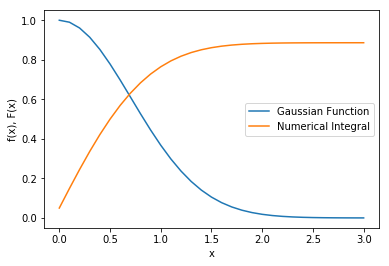

In [3]:
#Newman's problem wants us to do something different - 
#where we track Iab in steps so we can plot it, rather than calcuate the enitre integral
a=0.0
b=3.0
h=0.1
steps = int((b-a)/h)

Int_ab,x,Fx = integrate.integrate(f,(a,b),steps)
fx = np.empty(steps+1)

for i in range(fx.size):
    fx[i] = f(x[i])
    
plt.plot(x,fx,label="Gaussian Function")
plt.plot(x,Fx,label="Numerical Integral")
plt.ylabel("f(x), F(x)")
plt.xlabel("x")
plt.legend()


Above we plot the Gaussian function (blue line) and its integral (orange line) over the interval x=[0,3] as requested by Newman.  For the integration, I simply used the trapezoid rule, but it would be easy to change it to the Simpson's rule.

The analytic result is:  1.7724538509055159
Interval.    Numerical Soln      Percent Diff
       0 0.0199990000499983 0.9887167724904199
       0 0.1993320283817778 0.8875389459195552
       1 1.4936360029359399 0.1573061255316367
      10 1.7724538509055163 0.0000000000000003
     100 1.7724538509055172 0.0000000000000008
    1000 1.7724538509055177 0.0000000000000010


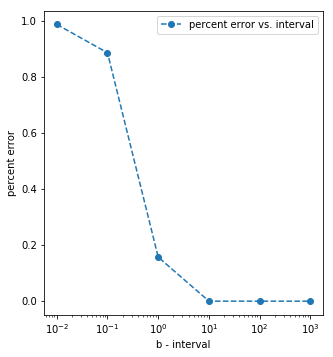

In [15]:
#Extension in Gaussian integrals

#a=-10   #low value of interval  (see loop below)
#b=-a    #high value of interval

#values to store as we loop through different intervals (b values) 
# and calculate the error
b_plot=[]     
error_plot=[]

h=0.01 #step width
soln= math.sqrt(math.pi)
print("The analytic result is: ",soln)
print("Interval.    Numerical Soln      Percent Diff")

for b in [0.01,0.1,1.0,10.0,100.0,1000.0]:
    a = -b 
    b_plot.append(b)
    #calculate the number of steps
    N_steps = np.int((b-a)/h)

    Iab = integrate.integrate(f,(a,b),N_steps,order=1)[0]  #we just want the sum

    #print(Iab)
    per_diff = abs(soln-Iab)/soln
    error_plot.append(per_diff)
    
    print("%8d %10.16lf %10.16lf"%(b,Iab, per_diff))
    
fig,ax = plt.subplots(figsize=(5, 5.6))

ax.set_xlabel("b - interval")
ax.set_ylabel("percent error")
ax.semilogx(b_plot,error_plot,'o--',label="percent error vs. interval")
plt.legend()

Above we plot an analysis of the approximation we made for the infinite Gaussian integral.  Instead of integrating from $\pm \infty$, we integrated from $\pm b$, where $b$ is plotted on the x-axis.  We calculated the the resulting integral and the percent difference from the exact result, and plotted the percent difference on the y-axis.  Since we sampled the interval over many orders of magnitude, we used a semilog plot to present the results.  However, a full loglog plot would show some subtleties in the small values  where $b=100-1000$.  We see that $b=10$ offers a very good approximation, with a percent error that is at the limit of the rounding error of double floating point precision.   

### Newman Exercise 5.4: The diffraction limit of a telescope

Our ability to resolve detail in astronomical observations is
limited by the diffraction of light in our telescopes.  Light from stars
can be treated effectively as coming from a point source at infinity.  When
such light, with wavelength $\lambda$, passes through the circular aperture
of a telescope (which we'll assume to have unit radius) and is focused by
the telescope in the focal plane, it produces not a single dot, but a
circular diffraction pattern consisting of central spot surrounded by a
series of concentric rings.  The intensity of the light in this diffraction
pattern is given by
$$
I(r) = \biggl( {J_1(kr)\over kr} \biggr)^2,
$$
where $r$ is the distance in the focal plane from the center of the
diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function.
The Bessel functions $J_m(x)$ are given by
$$
J_m(x) = {1\over\pi} \int_0^\pi \cos(m\theta - x\sin\theta) ~d\theta,
$$
where $m$ is a nonnegative integer and $x\ge0$.
1. Write a Python function ```J(m,x)``` that calculates the value of
  $J_m(x)$ using Simpson's rule with $N=1000$ points.  Use your
  function in a program to make a plot, on a single graph, of the Bessel
  functions $J_0$, $J_1$, and $J_2$ as a function of $x$ from $x=0$ to
  $x=20$.
2. Make a second program that makes a density plot of the intensity of
   the circular diffraction pattern of a point light source with
   $\lambda=500$ nm, in a square region of the focal plane, using the
   formula given above.  Your picture should cover values of $r$ from zero
   up to about $1\,\mu$m.


*Hint 1:* You may find it useful to know that $\lim_{x\to0} J_1(x)/x = 1/2$.  

*Hint 2:* The central spot in the diffraction pattern is
so bright that it may be difficult to see the rings around it on the
computer screen.  If you run into this problem a simple way to deal with it
is to use one of the other color schemes for density plots described in
Section 3.3.  The ``hot`` scheme works well.  For a more
sophisticated solution to the problem, the ``imshow`` function has an
additional argument ``vmax`` that allows you to set the value that
corresponds to the brightest point in the plot.  For instance, if you say
``imshow(x,vmax=0.1)``, then elements in ``x`` with value 0.1, or
any greater value, will produce the brightest (most positive) color on the
screen.  By lowering the ``vmax`` value, you can reduce the total range
of values between the minimum and maximum brightness, and hence increase
the sensitivity of the plot, making subtle details visible.  (There is also
a ``vmin`` argument that can be used to set the value that corresponds
to the dimmest (most negative) color.)  For this exercise a value of
``vmax=0.01`` appears to work well.

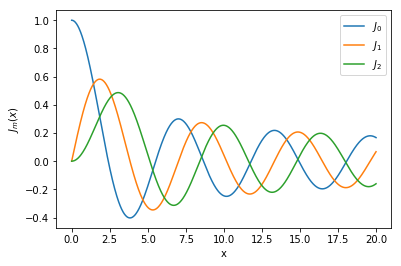

In [16]:
x1=0
x2=20

a=0
b=math.pi

N=1000

def J(m,x):
    '''Calculate the Bessel function'''
    
    
    def f_theta(theta):
        func_arg = 1/math.pi * math.cos(m*theta - x*math.sin(theta))
        return func_arg         
        
    I = integrate.integrate(f_theta,(a,b),N,order=2)[0]
    
    return I


########################
#Part a
########################
for m in [0,1,2]:
    
    x_array = np.linspace(x1,x2,N)
    J_m = np.empty(N)
    theta=0
    
    for i in range(x_array.size):
        J_m[i] = J(m,x_array[i])
        
    plt.plot(x_array,J_m,label=r"$J_{%d}(x)$"%(m))
    
plt.xlabel("x")
plt.ylabel(r"$J_m(x)$")
plt.legend()

Above we plot the first three Bessel functions $J_m(x)$ as marked in the plot legend.  The general form of the Bessel function appears as a decaying sinusoidal function.  We calculated these by integrating the following with our numerical methods for Simpson's rule.
$$
J_m(x) = {1\over\pi} \int_0^\pi \cos(m\theta - x\sin\theta) ~d\theta,
$$
where $m$ is a nonnegative integer and $x\ge0$


[-10.  10. -10.  10.]


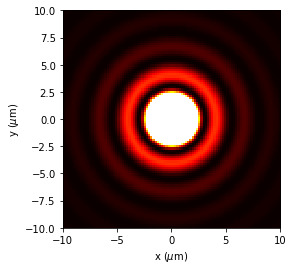

In [12]:
#########
#part b
#########
lambda1 = 500e-9
k = 2.0*math.pi/lambda1
N=100
xy_grid=np.empty([N,N],float)

x_max=1e-6

x_array = np.linspace(-x_max,x_max,N)
y_array = np.linspace(-x_max,x_max,N)

for i in range(len(x_array)):
    for j in range(len(y_array)):

        r = math.sqrt(x_array[i]**2 + y_array[j]**2)
        #print(i,j,r)
        if abs(r)<1e-9:
            
            xy_grid[i][j] = 0.5
        
        else:
            xy_grid[i][j] = ( J(1,k*r)/(k*r) )**2
            
extent1=10e6*np.array([-x_max,x_max,-x_max,x_max])
print(extent1)
plt.imshow(xy_grid,vmax=0.01,extent=extent1)
plt.xlabel(r"x ($\mu$m)")
plt.ylabel(r"y ($\mu$m)")
plt.hot()            

Above we plot the diffraction pattern for a circular apeture, as directed by Newman.  The axes of the plot represent the x-y dimensions of a 2D darkened screen.  The color is the light intensity, where the central circle is very bright - enough to saturate our color scheme, and the surrounding concentric rings are a result of the interference of bending light rays from the interaction with the obstacle (i.e. the screen containing the circular apeture). 

What is a diffraction pattern?  In the simplest model this is a coherent light source of planewaves - such as that formed by a laser.  When the light encounters the obstruction, it spreads out forming a pattern of disks surrounding the light that is transmitted straight through the hole (which forms a very bright disk of light).  These concentric rings with a central bright spot are known as an Airy disk pattern, named for a British astronomer who calculated its mathematical shape (the same as above).  
$$
I(r) = \biggl( {J_1(kr)\over kr} \biggr)^2,
$$
where $r$ is the distance in the focal plane from the center of the
diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function.
This is an important practical result, since even very good optical systems create such diffraction patterns, that may affect our measurements.

Mathematical models to calculate the pattern treat each differential piece of area comprising the circular apeture as a spherical point source.  Each point source sends out its own light rays.  Since the orignal light source, the laser, is made of coherent light, each point source has the same frequency and is in phase with every other point source.  Thus we get interference patterns where light waves can constructively or destructively add together - making bright and dark spots.